In [1]:
import h5py as hp
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import illustris_python as il
import matplotlib.gridspec as gspec
import matplotlib as mpl
import copy
from hc_lib.plots.fig_lib import FigureLibrary
tngpath = '/lustre/cosinga/L75n1820TNG/'
basepath = '/lustre/cosinga/hcolor/fig_md_analysis/'

In [2]:
fsr = hp.File(basepath+'HIXgalaxy/HIxGal_fieldnameR_spaceC_redshift.hdf5', 'r')
rfc = hp.File(basepath+'HIXgalaxy/HIxGal_redshiftR_fieldnameC_color.hdf5', 'r')
head = il.groupcat.loadHeader(tngpath+'output/', 99)


In [3]:
def get_match(props):
    keys = fsr.keys()
    matches = []
    for k in keys:
        is_match = True
        if 'x' in k:
            for p,v in props.items():
                try:
                    lval = fsr[k].attrs[p]
                    
                    is_match = (is_match and v in lval)
                except KeyError:
                    continue
            if is_match:
                matches.append(k)
    return matches

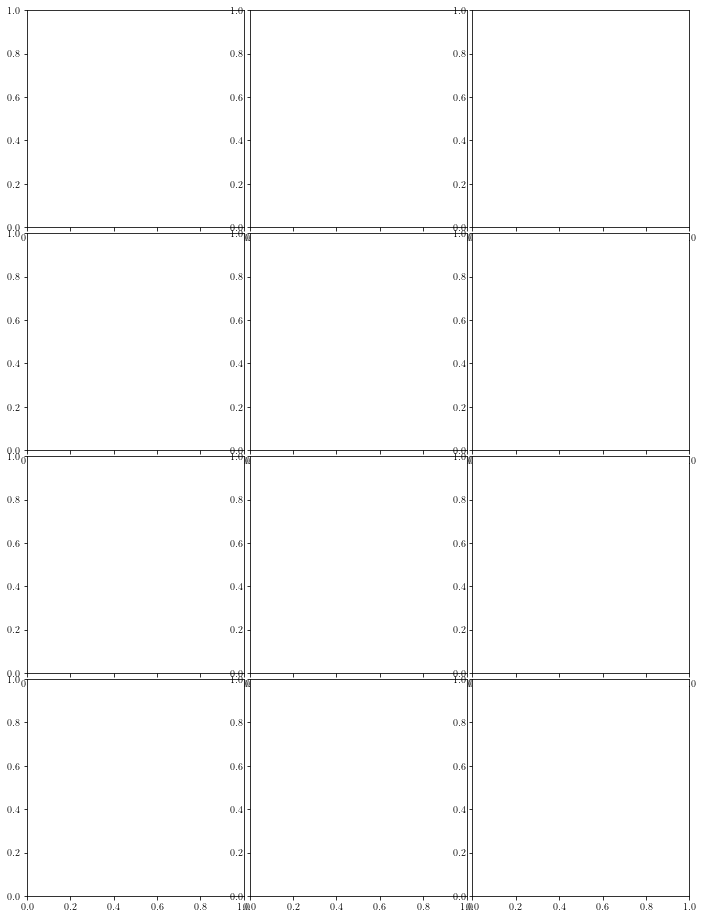

In [4]:
# redshift figure
nrows = 4
ncols = 3
xborder = 1
yborder = 1
panel_bt = 0.1
panel_length = 3


# border input can be either a list or single number
if isinstance(xborder, float) or isinstance(xborder, int):
    xborder = [xborder, xborder]
if isinstance(yborder, float) or isinstance(yborder, int):
    yborder = [yborder, yborder]
if isinstance(panel_bt, float) or isinstance(panel_bt, int):
    panel_bt = [panel_bt, panel_bt]
# creating Figure object

figwidth = panel_length * ncols + panel_bt[0] * (ncols - 1) + \
        xborder[0] + xborder[1]
figheight = panel_length * nrows + panel_bt[1] * (nrows - 1) + \
        yborder[0] + yborder[1]

fig = plt.figure(figsize=(figwidth, figheight))

# creating gridspec
gs = gspec.GridSpec(nrows, ncols)
plt.subplots_adjust(left= xborder[0]/figwidth, right=1-xborder[1]/figwidth,
        top=1-yborder[1]/figheight, bottom=yborder[0]/figheight,
        wspace=panel_bt[0]*ncols/figwidth, hspace=panel_bt[1]*nrows/figheight)

# making panels list
panels = []
for i in range(nrows):
    col_panels = []
    for j in range(ncols):
        col_panels.append(fig.add_subplot(gs[i, j]))

    panels.append(col_panels)

flib = FigureLibrary(fig=fig, panels=panels)
flib.panel_length = panel_length
flib.panel_bt = panel_bt
flib.xborder = xborder
flib.yborder = yborder
flib.figsize = [figwidth, figheight]